In [1]:
import numpy as np

# For reading and manipulating data
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

# For data Normalization
from sklearn.preprocessing import StandardScaler

# For splitting the data into training and testing sets
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# For checking performance of the model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# For model building
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
# 2. KNN
from sklearn.neighbors import KNeighborsClassifier
# 3. Random Forest
from sklearn.ensemble import RandomForestClassifier
# 4. SVM
from sklearn.svm import SVC
# 5. Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
# 6. Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# 8. Voting Classifier
from sklearn.ensemble import VotingClassifier

# To tabulate the results
from tabulate import tabulate

In [2]:
data = pd.read_csv('Dataset of Diabetes .csv')


In [3]:
# Shape of the dataset
data.shape

(1000, 14)

In [4]:
# First five rows of the dataset
data.head()
# Splitting the dataset into features and target variable



,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
#Distribution
data['CLASS'].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [6]:
# Assuming data is your DataFrame
data['CLASS'] = data['CLASS'].str.strip()  # Remove trailing whitespaces

# Replace 'Y ' and 'N ' with 'Y' and 'N' respectively
data['CLASS'] = data['CLASS'].replace({'Y ': 'Y', 'N ': 'N'})

# Now, let's check the updated value counts
print(data['CLASS'].value_counts())


Y    844
N    103
P     53
Name: CLASS, dtype: int64


In [7]:
data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming data is your DataFrame
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Gender'
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Encode 'CLASS'
data['CLASS'] = label_encoder.fit_transform(data['CLASS'])

# Now, let's check the encoded values
print(data['Gender'].unique())  # Print unique encoded values of 'Gender'
print(data['CLASS'].unique())   # Print unique encoded values of 'CLASS'


[0 1 2]
[0 1 2]


In [9]:
data.head()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


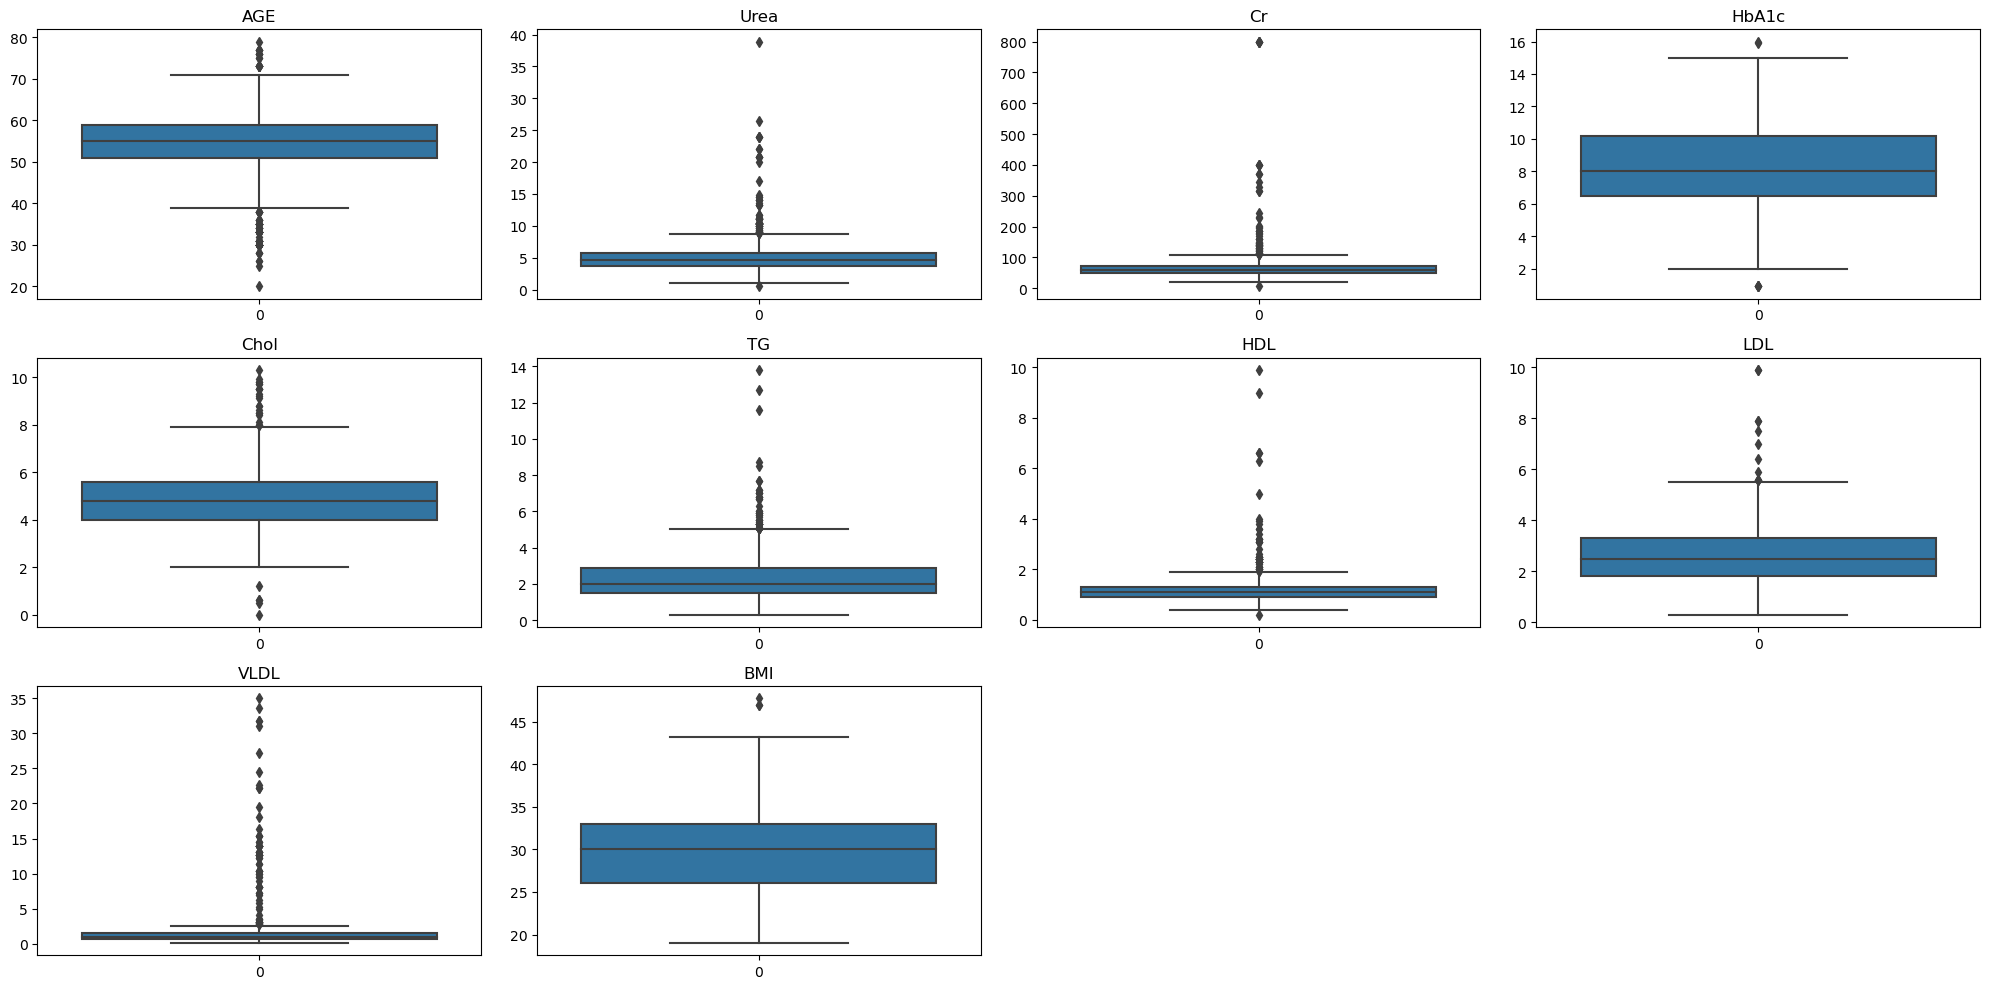

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your pandas DataFrame

# Define the numerical columns
numerical_columns = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [11]:
# Initialize lists to store boundary values for each attribute
Attributes = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

Max_Boundary_Values = []
Min_Boundary_Values = []

# Loop through each attribute
for attribute in Attributes:
    # Calculate upper and lower boundary values
    upper_boundary = data[attribute].mean() + 3 * data[attribute].std()
    lower_boundary = data[attribute].mean() - 3 * data[attribute].std()
    
    # Append boundary values to respective lists
    Max_Boundary_Values.append(upper_boundary)
    Min_Boundary_Values.append(lower_boundary)
    
    # Print attribute name and boundary values
    print(attribute)
    print('******************************')
    print('Max_BV:', upper_boundary)
    print('Min_BV:', lower_boundary)
    print()


AGE
******************************
Max_BV: 79.92572307953441
Min_BV: 27.130276920465597

Urea
******************************
Max_BV: 13.930239324573714
Min_BV: -3.680753324573713

Cr
******************************
Max_BV: 248.89724220697968
Min_BV: -111.01124220697967

HbA1c
******************************
Max_BV: 15.883169368320734
Min_BV: 0.6791506316792653

Chol
******************************
Max_BV: 8.76803255676481
Min_BV: 0.9576074432351906

TG
******************************
Max_BV: 6.5531380633390945
Min_BV: -1.8539180633390941

HDL
******************************
Max_BV: 3.185990710325796
Min_BV: -0.7764907103257961

LDL
******************************
Max_BV: 5.955095243213282
Min_BV: -0.7355152432132823

VLDL
******************************
Max_BV: 12.845497915930833
Min_BV: -9.136097915930835

BMI
******************************
Max_BV: 44.46518433637976
Min_BV: 14.690855663620248



In [12]:
# Apply outlier detection based on calculated boundary values
new_data = data[
    (data['AGE'] < 79.93) & (data['AGE'] > 27.13) &
    (data['Urea'] < 13.93) & (data['Urea'] > -3.68) &
    (data['Cr'] < 248.90) & (data['Cr'] > -111.01) &
    (data['HbA1c'] < 15.88) & (data['HbA1c'] > 0.68) &
    (data['Chol'] < 8.77) & (data['Chol'] > 0.96) &
    (data['TG'] < 6.55) & (data['TG'] > -1.85) &
    (data['HDL'] < 3.19) & (data['HDL'] > -0.78) &
    (data['LDL'] < 5.96) & (data['LDL'] > -0.74) &
    (data['VLDL'] < 12.85) & (data['VLDL'] > -9.14) &
    (data['BMI'] < 44.47) & (data['BMI'] > 14.69)
]

# Describe the resulting new_data
new_data.describe()


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,891.000000,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,335.196409,2.817689e+05,0.544332,53.553311,4.816644,62.063973,8.195466,4.782604,2.219383,1.148350,2.581538,1.275309,29.261706,1.730640
std,237.717254,3.570119e+06,0.500560,8.542177,1.886865,23.405976,2.523654,1.131262,1.145188,0.386981,1.006042,1.633586,4.748973,0.638954
min,2.000000,1.230000e+02,0.000000,28.000000,0.500000,6.000000,0.900000,1.200000,0.300000,0.200000,0.300000,0.100000,19.000000,0.000000
25%,124.500000,2.405850e+04,0.000000,51.000000,3.600000,47.000000,6.450000,4.000000,1.400000,0.900000,1.800000,0.700000,26.000000,2.000000
50%,292.000000,3.438800e+04,1.000000,55.000000,4.600000,59.000000,8.000000,4.700000,2.000000,1.100000,2.500000,0.900000,30.000000,2.000000
75%,530.500000,4.537900e+04,1.000000,59.000000,5.600000,72.000000,10.000000,5.500000,2.700000,1.300000,3.300000,1.400000,33.000000,2.000000
max,800.000000,7.543566e+07,2.000000,79.000000,13.300000,203.000000,15.000000,8.600000,6.300000,3.100000,5.600000,12.700000,40.000000,2.000000


In [13]:
print(new_data['CLASS'].value_counts())

2    745
0     94
1     52
Name: CLASS, dtype: int64


In [14]:
# Drop 'ID' and 'No_Pation' columns from the feature matrix
X = new_data.drop(columns=['ID', 'No_Pation', 'CLASS'])

# Create the target vector 'y' from the 'CLASS' column
y = new_data['CLASS']

# Print the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (891, 11)
Shape of y: (891,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
le_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",le_accuracy)

Accuracy: 0.888268156424581


In [16]:
# Step 3: Train SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 4: Evaluate SVM classifier
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)


SVM Accuracy: 0.9050279329608939


In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Evaluate Random Forest classifier
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9664804469273743


In [18]:
from tabulate import tabulate

# Accuracy scores obtained from evaluating each model on the test data
accuracy_scores = [
    ['SVM', svm_accuracy],
    ['Random Forest', rf_accuracy],
    ['LogisticRegression',le_accuracy]
]

# Print the table
print(tabulate(accuracy_scores, headers=['Model', 'Accuracy'], tablefmt='rst'))


==================  ==========
Model                 Accuracy
==================  ==========
SVM                   0.905028
Random Forest         0.96648
LogisticRegression    0.888268
==================  ==========


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 5: Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 6: Train the Decision Tree classifier on the training data
dt_model.fit(X_train, y_train)

# Step 7: Evaluate the Decision Tree classifier on the testing data
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.9776536312849162


In [20]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # Number of classes is 3
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', test_accuracy)





Epoch 1/50


18/18 [==============================] - 4s 53ms/step - loss: 1.0183 - accuracy: 0.7944 - val_loss: 0.7667 - val_accuracy: 0.7972
Epoch 2/50
18/18 [==============================] - 0s 9ms/step - loss: 0.5328 - accuracy: 0.8383 - val_loss: 0.5807 - val_accuracy: 0.8042
Epoch 3/50
18/18 [==============================] - 0s 10ms/step - loss: 0.4361 - accuracy: 0.8436 - val_loss: 0.6285 - val_accuracy: 0.8042
Epoch 4/50
18/18 [==============================] - 0s 10ms/step - loss: 0.4438 - accuracy: 0.8260 - val_loss: 0.4683 - val_accuracy: 0.8112
Epoch 5/50
18/18 [==============================] - 0s 9ms/step - loss: 0.4090 - accuracy: 0.8506 - val_loss: 0.4921 - val_accuracy: 0.7972
Epoch 6/50
18/18 [==============================] - 0s 10ms/step - loss: 0.3829 - accuracy: 0.8524 - val_loss: 0.4528 - val_accuracy: 0.8042
Epoch 7/50
18/18 [==============================] - 0s 10ms/step - loss: 0.3688 - accuracy: 0.8401 - val_loss: 0.4963 - val_accuracy: 0.8042
Epoch 8/50

6/6 [==============================] - 0s 5ms/step - loss: 0.4420 - accuracy: 0.8715
Test accuracy: 0.8715083599090576


In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 3: Initialize SVM, Random Forest, and Decision Tree classifiers
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Step 4: Initialize Voting classifier with the above models
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('dt', dt_model)], voting='hard')

# Step 5: Train Voting classifier
voting_clf.fit(X_train, y_train)

# Step 6: Evaluate Voting classifier
voting_y_pred = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_y_pred)
print("Voting Classifier Accuracy:", voting_accuracy)


Voting Classifier Accuracy: 0.9832402234636871


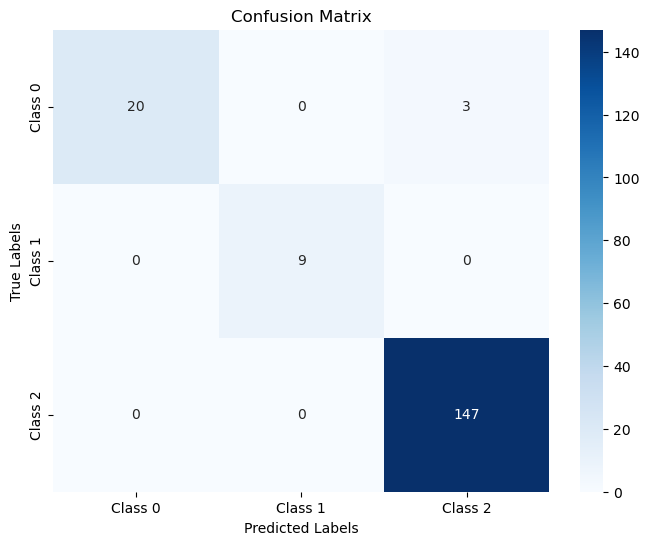

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, voting_y_pred)

# Step 8: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
ensemble_report = classification_report(y_test, voting_y_pred, target_names=['Class 0', 'Class 1', 'Class 2'])
print("\nEnsemble Classification Report:")
print(ensemble_report)



Ensemble Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.87      0.93        23
     Class 1       1.00      1.00      1.00         9
     Class 2       0.98      1.00      0.99       147

    accuracy                           0.98       179
   macro avg       0.99      0.96      0.97       179
weighted avg       0.98      0.98      0.98       179



In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Step 2: Train the KNN classifier
knn_model.fit(X_train, y_train)

# Step 3: Make predictions using the trained KNN classifier
knn_y_pred = knn_model.predict(X_test)

# Step 4: Evaluate the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.8603351955307262
